I cannot remember where this code came from. There are a lot of examples of wine quality machine learning and this is one of them using the red wine data set. This code needs to be checked for overfitting. I ran through this exercise just to take a look at the result and decide what route I wanted to take for my project.

This code reflects that used in the red_wine_quality notebook

## Predicting Red Wine Quality

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Read in the csv file
wine_data=pd.read_csv("winequality-white.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<AxesSubplot:xlabel='quality', ylabel='count'>

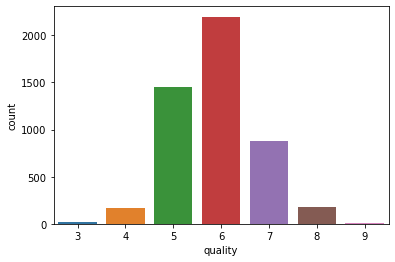

In [3]:
# graph the count of quality scores
sns.countplot(x='quality',data=wine_data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

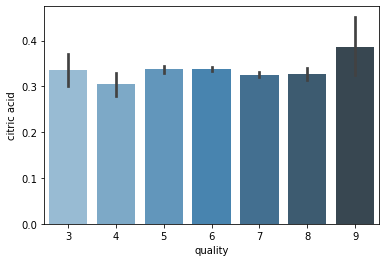

In [4]:
# plot the level of citric acid in each quality
sns.barplot(x='quality',y='citric acid',data=wine_data, palette="Blues_d")

#### Now we get X as input and y as a target of data than splitting data into train and test data.

In [5]:
# split the data into train and test
X=wine_data.drop("quality",axis=1)
y=wine_data['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=51)

#### Scaling and transforming data.

In [6]:
SC=StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

#### Initializing the model and fitting training data into it. Here, we use a Random forest classifier.

In [7]:
RFC= RandomForestClassifier(n_estimators=200)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### Predicting data for test data.

In [8]:
y_pred = RFC.predict(X_test)

In [9]:
print(y_pred)

[7 7 7 ... 6 5 6]


#### Finding the accuracy of the model.

In [10]:
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of the model is {:.2f}% '.format(accuracy*100))

accuracy of the model is 69.59% 


In [11]:
# overfitting causes lower accuracy (something to investigate)